<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Assignment_1_MLE2_Korman_JamesG_ICPSR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Notes**



*   For this assignment, you will utilize the Garrett data available on the Canvas site. The Garrett data are employed in his book, Partisan Politics in the Global Economy (Cambridge University Press, 1998). With the exception of country, the variables are largely self-explanatory. The country variable includes identifiers for 14 OECD countries. The country codes are: 2 = US, 20 = Canada, 200 = UK, 210 = Netherlands, 211 = Belgium, 220 = France, 260 = Germany, 305 = Austria, 325 = Italy, 375 = Finland, 380 = Sweden, 385 = Norway, 390 = Denmark, 740 = Japan. The data cover the years from 1966-1990. N = 14, T = 25, NT = 350.

*   For this assignment, we will examine whether power of labor parties (leftlab) influence economic growth, controlling for other economic factors. For this assignment, treat the data as repeated observations (time) nested within countries.

* Instructions: Proceed serially through the questions below. Type your answers to the following questions and include any relevant output (code and results), either in the text or attached at the end. If you include the output in the text, you will find that the output is easier to organize if you use a monospaced typeface, like it appears in your Stata and/or R consoles. That is why you will find instructions throughout the assignment encouraging you to use 10pt courier font. If you attach the output to the end, reference the relevant output. Be sure to discuss results at each stage, including any relevant statistics.

Questions:

1. 1. In a few sentences, theorize the relationship between labor party power and economic growth.

2. Estimate a random intercepts model with economic development (gdp) as the dependent variable, leftlab as the independent variable, and include three economic-based variables. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results

3. Using the model estimated in question #1, add a random effect to one of the independent variables of your choosing. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results.


4. Conduct a likelihood ratio test to determine whether the model warrants a random slope effect. For Stata users, you will use the lrtest command (make sure to store the estimates for the random intercept and random slope models). For R users, you will use the anova() function (make sure to specify the object name for the “restricted model” (random intercept) first, followed by the object name for the “unrestricted model” (random slope) second).

5. Explain the importance for estimating a multilevel model for nested data. What are the issues one may encounter if utilizing a pooled model?





# **Useful Links**



https://cran.microsoft.com/snapshot/2017-04-21/web/packages/sjPlot/vignettes/sjplmer.html

https://www.pythonfordatascience.org/mixed-effects-regression-python/

http://mfviz.com/hierarchical-models/

https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html

In [1]:
!pip install researchpy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Question 1** 

* **Question**: In a few sentences, theorize the relationship between labor party power and economic growth.

* **Answer**: left labor party power should have a negative effect on economic growth in the general sense as labor parties and parties of the left are much more union-oriented and choose to promote higher taxes and welfare. Such policies are not conducive for pure economic growth -- as growth is fostered via competitiveness -- and a given economy is competitive (especially internationall) if it has low taxes and favorable business regulations -- both components that parties of the left shun against relative to parties of the right that are historically more business oriented. 

# **Question 2 Random Intercepts Model**

* **Question**: Estimate a random intercepts model with economic development (gdp) as the dependent variable, leftlab as the independent variable, and include three economic-based variables. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results

In [2]:
dtafile = "/content/drive/MyDrive/Delaware/ICPSR_2022/MLE 2/Assignments/Assignment 1/GarrettData.dta"
df = pd.read_stata(dtafile)
df

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,Icc_13,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0,0,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0,0,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0,0,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0,0,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0,0,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0,1,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0,1,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0,1,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0,1,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027


In [3]:
# calculating groupmean averages for our country for inflation
infl_group_avg = df.groupby('country').mean()['infl']
infl_group_avg

country
2.0       5.892
20.0      6.392
200.0     9.072
210.0     4.880
211.0     5.496
220.0     7.280
260.0     3.628
305.0     4.568
325.0    10.064
375.0     8.160
380.0     7.636
385.0     7.416
390.0     7.604
740.0     5.540
Name: infl, dtype: float32

In [4]:
# creating a dictionary from the variable above to map into dataframe
infl_group_avg = dict(infl_group_avg)
infl_group_avg

{2.0: 5.892,
 20.0: 6.392,
 200.0: 9.072,
 210.0: 4.88,
 211.0: 5.496,
 220.0: 7.28,
 260.0: 3.628,
 305.0: 4.568,
 325.0: 10.064,
 375.0: 8.16,
 380.0: 7.636,
 385.0: 7.416,
 390.0: 7.604,
 740.0: 5.54}

In [5]:
# putting in the country-group means of inlfation into the dataframe
df['infl_group_avg'] = df['country'].map(infl_group_avg)
df

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,1,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,1,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,1,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,1,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540


In [6]:
# describing our data seeing what it's like
df.describe()

,country,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,oild,...,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,287.357147,4.993873,6.687714,3.254223,4.831613,6.682971,3.336108,57.076248,0.891429,0.015280,...,0.071429,0.320000,0.240000,0.200000,0.200000,3.015532,2.027701,6.763461,187.422256,6.687714
std,173.574265,3.240486,4.079510,2.432580,3.252729,4.062208,2.427306,26.914648,0.895507,0.027165,...,0.257908,0.467144,0.427695,0.400573,0.400573,1.033199,0.985260,4.571550,129.179260,1.743853
min,2.000000,0.684780,-0.700000,-4.300000,0.600000,-0.700000,-4.300000,9.622906,0.000000,-0.117810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.414955,0.050658,0.084999,-39.171421,3.628000
25%,210.000000,2.099248,3.700000,1.877098,2.000000,3.800000,2.000000,41.419391,0.000000,0.003662,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.189081,1.143009,2.542276,92.589357,5.496000
50%,282.500000,4.500000,5.900000,3.200000,3.900000,5.900000,3.300000,52.624180,1.000000,0.013674,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.230290,2.174839,6.396097,177.518349,6.836000
75%,380.000000,7.300000,9.075000,4.700000,7.100000,8.900000,4.794516,71.847086,1.000000,0.030052,...,0.000000,1.000000,0.000000,0.000000,0.000000,3.794158,2.809576,10.014869,257.054947,7.636000
max,740.000000,13.000000,24.500000,12.800000,13.000000,24.500000,12.800000,146.020203,4.000000,0.083460,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.819816,3.570835,17.161753,644.791138,10.064000


**Estimating the Random Intercepts Model**

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.mixedlm("gdp ~ leftlab + infl + infl_group_avg + unem + trade",
                    df,
                    groups= "country").fit()

print(model.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: gdp      
No. Observations:   350     Method:             REML     
No. Groups:         14      Scale:              3.9820   
Min. group size:    25      Likelihood:         -757.7985
Max. group size:    25      Converged:          Yes      
Mean group size:    25.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       5.996    1.117  5.370 0.000  3.808  8.185
leftlab        -0.149    0.176 -0.847 0.397 -0.495  0.196
infl           -0.219    0.030 -7.396 0.000 -0.276 -0.161
infl_group_avg  0.193    0.147  1.313 0.189 -0.095  0.480
unem           -0.309    0.048 -6.392 0.000 -0.404 -0.214
trade          -0.013    0.009 -1.443 0.149 -0.030  0.005
country Var     0.622    0.176                           



In [9]:
# creating a list out of the keys in the dictionary for country identifiers in this case
country = list(model.random_effects.keys())
country


[2.0,
 20.0,
 200.0,
 210.0,
 211.0,
 220.0,
 260.0,
 305.0,
 325.0,
 375.0,
 380.0,
 385.0,
 390.0,
 740.0]

In [10]:
# creating a list of our dictionary values for our random effects (random intercepts)
values = list(model.random_effects.values())
values

[country   -0.551358
 dtype: float64, country    0.753193
 dtype: float64, country   -0.597416
 dtype: float64, country    0.168051
 dtype: float64, country    0.865832
 dtype: float64, country   -0.059654
 dtype: float64, country   -0.519829
 dtype: float64, country   -0.296674
 dtype: float64, country    0.723537
 dtype: float64, country    0.174182
 dtype: float64, country   -1.308849
 dtype: float64, country    0.185674
 dtype: float64, country   -0.339949
 dtype: float64, country    0.80326
 dtype: float64]

In [11]:
# converting all values into a string to seaprate them by word in order to access the values we need in a non-messy format
values = str(values)
# sparating all of the values by word using the split function
values = values.split()
# printing the values
values

['[country',
 '-0.551358',
 'dtype:',
 'float64,',
 'country',
 '0.753193',
 'dtype:',
 'float64,',
 'country',
 '-0.597416',
 'dtype:',
 'float64,',
 'country',
 '0.168051',
 'dtype:',
 'float64,',
 'country',
 '0.865832',
 'dtype:',
 'float64,',
 'country',
 '-0.059654',
 'dtype:',
 'float64,',
 'country',
 '-0.519829',
 'dtype:',
 'float64,',
 'country',
 '-0.296674',
 'dtype:',
 'float64,',
 'country',
 '0.723537',
 'dtype:',
 'float64,',
 'country',
 '0.174182',
 'dtype:',
 'float64,',
 'country',
 '-1.308849',
 'dtype:',
 'float64,',
 'country',
 '0.185674',
 'dtype:',
 'float64,',
 'country',
 '-0.339949',
 'dtype:',
 'float64,',
 'country',
 '0.80326',
 'dtype:',
 'float64]']

In [12]:
# creating a list of only the random effects values for our random intercepts by starting at index of one and accessing every 4th value
random_intercepts = values[1::4]
random_intercepts

['-0.551358',
 '0.753193',
 '-0.597416',
 '0.168051',
 '0.865832',
 '-0.059654',
 '-0.519829',
 '-0.296674',
 '0.723537',
 '0.174182',
 '-1.308849',
 '0.185674',
 '-0.339949',
 '0.80326']

In [13]:
# creating a dictionary of our country keys and random effects values for the random intercepts for country level group random intercepts"
random_intercepts = dict(zip(country, random_intercepts))
random_intercepts

{2.0: '-0.551358',
 20.0: '0.753193',
 200.0: '-0.597416',
 210.0: '0.168051',
 211.0: '0.865832',
 220.0: '-0.059654',
 260.0: '-0.519829',
 305.0: '-0.296674',
 325.0: '0.723537',
 375.0: '0.174182',
 380.0: '-1.308849',
 385.0: '0.185674',
 390.0: '-0.339949',
 740.0: '0.80326'}

In [14]:
# making a copy of the dataframe
df_new = df.copy()
# putting the random effects (random intercepts) into the new dataframe via mapping
df_new['random_effects'] = df_new['country'].map(random_intercepts)
df_new

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.551358
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.551358
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.551358
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.551358
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.551358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.80326
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.80326
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.80326
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.80326


In [15]:
print(model.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: gdp      
No. Observations:   350     Method:             REML     
No. Groups:         14      Scale:              3.9820   
Min. group size:    25      Likelihood:         -757.7985
Max. group size:    25      Converged:          Yes      
Mean group size:    25.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       5.996    1.117  5.370 0.000  3.808  8.185
leftlab        -0.149    0.176 -0.847 0.397 -0.495  0.196
infl           -0.219    0.030 -7.396 0.000 -0.276 -0.161
infl_group_avg  0.193    0.147  1.313 0.189 -0.095  0.480
unem           -0.309    0.048 -6.392 0.000 -0.404 -0.214
trade          -0.013    0.009 -1.443 0.149 -0.030  0.005
country Var     0.622    0.176                           



In [16]:
# converting the random effects values to float
df_new['random_effects'] = df_new['random_effects'].astype(float)
df_new

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.551358
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.551358
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.551358
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.551358
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.551358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.803260
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.803260
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.803260
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.803260


In [17]:
df_new.columns

Index(['country', 'year', 'unem', 'infl', 'gdp', 'uneml', 'infll', 'gdpl',
       'trade', 'capmob', 'oild', 'Icc_2', 'Icc_3', 'Icc_4', 'Icc_5', 'Icc_6',
       'Icc_7', 'Icc_8', 'Icc_9', 'Icc_10', 'Icc_11', 'Icc_12', 'Icc_13',
       'Icc_14', 'per6673', 'per7479', 'per8084', 'per8690', 'corp', 'leftlab',
       'clint', 'demand', 'infl_group_avg', 'random_effects'],
      dtype='object')

In [18]:
# within group effects (fixed effects with random intercepts)
df_new['y_hat_within'] = (model.params[0] + df_new['random_effects']) + (model.params[1] * df_new['leftlab'].mean()) + (model.params[2] * df_new['infl']) + (model.params[3] * df_new['infl_group_avg'].mean()) + (model.params[4] * df_new['unem'].mean()) + (model.params[5] * df_new['trade'].mean())
df_new

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.551358,3.530615
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.551358,3.552468
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.551358,3.246519
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.551358,2.984276
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.551358,2.875008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.803260,5.562692
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.803260,5.016354


In [19]:
# this is all the linear prediction is for multilevel model
df_new['y_hat_between'] = (model.params[0]) + (model.params[1] * df_new['leftlab'].mean()) + ((model.params[2] + model.params[3]) * df_new['infl_group_avg']) + (model.params[4] * df_new['unem'].mean()) + (model.params[5] * df_new['trade'].mean())
# for random slopes -- we do the same above -- and if we have random slopes for a slope coefficient, it will be the reported average slope coefficient plus, the random slope effect, * observed value for that variable and the other variables would be held constant at their mean value 
df_new

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within,y_hat_between
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.551358,3.530615,3.274878
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.551358,3.552468,3.274878
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.551358,3.246519,3.274878
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.551358,2.984276,3.274878
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.551358,2.875008,3.274878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571,3.284014
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.803260,5.562692,3.284014
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717,3.284014
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.803260,5.016354,3.284014


In [20]:
# toy code to do the above but for random slopes and intercepts
#   df['y_hat'] = (7.268 + df['random_effects']) + (-0.105 * df['leftlab'].mean()) + ((-0.210 + df['random_slope']) * df['infl']) + (-0.295 * df['unem'].mean()) + (-0.016 * df['trade'].mean())

In [21]:
df_new_sort = df_new.sort_values(['country', 'y_hat_within']).copy()
df_new_sort

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within,y_hat_between
14,2.0,1980-01-01,7.1,13.5,-0.4,5.8,11.3,2.6,19.732849,0.0,...,1.0,0.0,2.031032,1.299158,2.638631,23.679420,5.892,-0.551358,1.214140,3.274878
13,2.0,1979-01-01,5.8,11.3,2.6,6.1,7.7,4.7,18.175911,0.0,...,0.0,0.0,1.883898,1.299158,2.447482,58.162914,5.892,-0.551358,1.694917,3.274878
8,2.0,1974-01-01,5.6,11.0,-0.9,4.9,6.2,5.7,13.772550,0.0,...,0.0,0.0,1.940439,0.433172,0.840543,11.018040,5.892,-0.551358,1.760478,3.274878
15,2.0,1981-01-01,7.5,10.4,3.4,7.1,13.5,-0.4,21.510571,0.0,...,1.0,0.0,2.002635,0.433172,0.867485,36.567970,5.892,-0.551358,1.891599,3.274878
9,2.0,1975-01-01,8.5,9.1,-0.8,5.6,11.0,-0.9,17.423260,0.0,...,0.0,0.0,1.973228,0.640445,1.263744,-5.226978,5.892,-0.551358,2.175695,3.274878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,740.0,1985-01-01,2.6,2.0,4.7,2.7,2.2,5.0,30.654100,0.0,...,0.0,0.0,1.948334,1.049339,2.044463,107.289352,5.540,0.803260,5.081914,3.284014
342,740.0,1983-01-01,2.6,1.9,3.2,2.4,2.7,2.8,32.806080,0.0,...,1.0,0.0,2.421978,1.049339,2.541476,88.576416,5.540,0.803260,5.103768,3.284014
347,740.0,1988-01-01,2.5,0.5,5.7,2.9,-0.2,4.4,21.712351,0.0,...,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717,3.284014
345,740.0,1986-01-01,2.8,0.4,2.5,2.6,2.0,4.7,29.161591,0.0,...,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571,3.284014


In [22]:
# creating a list of countries to add into the the plot's legend 
country = df_new_sort['country']
country = pd.Series(country.unique())
country = country.to_list()
country

[2.0,
 20.0,
 200.0,
 210.0,
 211.0,
 220.0,
 260.0,
 305.0,
 325.0,
 375.0,
 380.0,
 385.0,
 390.0,
 740.0]

For between eeffect -- take value of level 2 variable -- and calculate the fitted value for the between model -- 
say we included x at level 1 and 2 -- it would be average intercept + sum of coefficient x at level 1 and x at level 2 added together --> and multiply summed coeffiicent by obseved value of the level 2 variable 



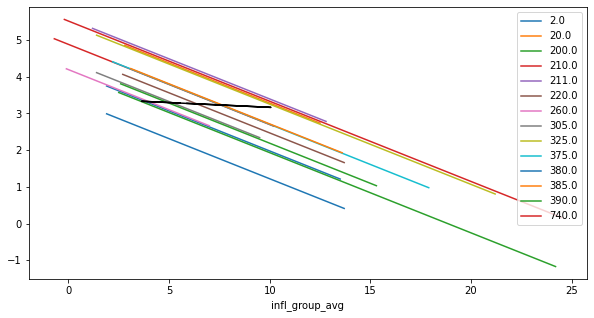

In [23]:
# plotting the within group effects and between group effects for inflation

fig, ax = plt.subplots(figsize=(10, 5))
df_new_sort.groupby('country').plot('infl', 'y_hat_within', ax=ax)
df_new_sort.plot('infl_group_avg', 'y_hat_between', ax=ax, color='black')
ax.legend(country)


In [24]:
# creating  a list of colors to map into the dataframe for plotting
colors = ['red', 'blue', 'black', 'purple', 'yellow', 'pink', 'green', 'gold', 'grey', 'silver', 'firebrick', 'darkred', 'coral', 'salmon']
colors_dict = dict(zip(country, colors))
df_new_sort['colors'] = df_new_sort['country'].map(colors_dict)
df_new_sort


,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per8690,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within,y_hat_between,colors
14,2.0,1980-01-01,7.1,13.5,-0.4,5.8,11.3,2.6,19.732849,0.0,...,0.0,2.031032,1.299158,2.638631,23.679420,5.892,-0.551358,1.214140,3.274878,red
13,2.0,1979-01-01,5.8,11.3,2.6,6.1,7.7,4.7,18.175911,0.0,...,0.0,1.883898,1.299158,2.447482,58.162914,5.892,-0.551358,1.694917,3.274878,red
8,2.0,1974-01-01,5.6,11.0,-0.9,4.9,6.2,5.7,13.772550,0.0,...,0.0,1.940439,0.433172,0.840543,11.018040,5.892,-0.551358,1.760478,3.274878,red
15,2.0,1981-01-01,7.5,10.4,3.4,7.1,13.5,-0.4,21.510571,0.0,...,0.0,2.002635,0.433172,0.867485,36.567970,5.892,-0.551358,1.891599,3.274878,red
9,2.0,1975-01-01,8.5,9.1,-0.8,5.6,11.0,-0.9,17.423260,0.0,...,0.0,1.973228,0.640445,1.263744,-5.226978,5.892,-0.551358,2.175695,3.274878,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,740.0,1985-01-01,2.6,2.0,4.7,2.7,2.2,5.0,30.654100,0.0,...,0.0,1.948334,1.049339,2.044463,107.289352,5.540,0.803260,5.081914,3.284014,salmon
342,740.0,1983-01-01,2.6,1.9,3.2,2.4,2.7,2.8,32.806080,0.0,...,0.0,2.421978,1.049339,2.541476,88.576416,5.540,0.803260,5.103768,3.284014,salmon
347,740.0,1988-01-01,2.5,0.5,5.7,2.9,-0.2,4.4,21.712351,0.0,...,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717,3.284014,salmon
345,740.0,1986-01-01,2.8,0.4,2.5,2.6,2.0,4.7,29.161591,0.0,...,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571,3.284014,salmon


## **Plotting & calculating only the random intercepts spaghetti plot/estimates (no between group effect only focusing on within-group effect and our varying intercepts**

In [25]:
model.params

Intercept         5.996242
leftlab          -0.149243
infl             -0.218535
infl_group_avg    0.192578
unem             -0.308988
trade            -0.012663
country Var       0.156257
dtype: float64

In [26]:
# within group effects (fixed effects with random intercepts)
df_new_sort['y_hat'] = ((model.params[0] + df_new_sort['random_effects']) + (model.params[1] * df_new_sort['leftlab'].mean()) + (model.params[2] * df_new_sort['infl']) + (model.params[3] * df_new_sort['infl_group_avg'].mean()) + (model.params[4] * df_new_sort['unem'].mean()) + (model.params[5] * df_new_sort['trade'].mean()))
df_new_sort

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within,y_hat_between,colors,y_hat
14,2.0,1980-01-01,7.1,13.5,-0.4,5.8,11.3,2.6,19.732849,0.0,...,2.031032,1.299158,2.638631,23.679420,5.892,-0.551358,1.214140,3.274878,red,1.214140
13,2.0,1979-01-01,5.8,11.3,2.6,6.1,7.7,4.7,18.175911,0.0,...,1.883898,1.299158,2.447482,58.162914,5.892,-0.551358,1.694917,3.274878,red,1.694917
8,2.0,1974-01-01,5.6,11.0,-0.9,4.9,6.2,5.7,13.772550,0.0,...,1.940439,0.433172,0.840543,11.018040,5.892,-0.551358,1.760478,3.274878,red,1.760478
15,2.0,1981-01-01,7.5,10.4,3.4,7.1,13.5,-0.4,21.510571,0.0,...,2.002635,0.433172,0.867485,36.567970,5.892,-0.551358,1.891599,3.274878,red,1.891599
9,2.0,1975-01-01,8.5,9.1,-0.8,5.6,11.0,-0.9,17.423260,0.0,...,1.973228,0.640445,1.263744,-5.226978,5.892,-0.551358,2.175695,3.274878,red,2.175695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,740.0,1985-01-01,2.6,2.0,4.7,2.7,2.2,5.0,30.654100,0.0,...,1.948334,1.049339,2.044463,107.289352,5.540,0.803260,5.081914,3.284014,salmon,5.081914
342,740.0,1983-01-01,2.6,1.9,3.2,2.4,2.7,2.8,32.806080,0.0,...,2.421978,1.049339,2.541476,88.576416,5.540,0.803260,5.103768,3.284014,salmon,5.103768
347,740.0,1988-01-01,2.5,0.5,5.7,2.9,-0.2,4.4,21.712351,0.0,...,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717,3.284014,salmon,5.409717
345,740.0,1986-01-01,2.8,0.4,2.5,2.6,2.0,4.7,29.161591,0.0,...,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571,3.284014,salmon,5.431571


In [27]:
df_new_sort = df_new_sort.sort_values(['country', 'y_hat'])
df_new_sort

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,corp,leftlab,clint,demand,infl_group_avg,random_effects,y_hat_within,y_hat_between,colors,y_hat
14,2.0,1980-01-01,7.1,13.5,-0.4,5.8,11.3,2.6,19.732849,0.0,...,2.031032,1.299158,2.638631,23.679420,5.892,-0.551358,1.214140,3.274878,red,1.214140
13,2.0,1979-01-01,5.8,11.3,2.6,6.1,7.7,4.7,18.175911,0.0,...,1.883898,1.299158,2.447482,58.162914,5.892,-0.551358,1.694917,3.274878,red,1.694917
8,2.0,1974-01-01,5.6,11.0,-0.9,4.9,6.2,5.7,13.772550,0.0,...,1.940439,0.433172,0.840543,11.018040,5.892,-0.551358,1.760478,3.274878,red,1.760478
15,2.0,1981-01-01,7.5,10.4,3.4,7.1,13.5,-0.4,21.510571,0.0,...,2.002635,0.433172,0.867485,36.567970,5.892,-0.551358,1.891599,3.274878,red,1.891599
9,2.0,1975-01-01,8.5,9.1,-0.8,5.6,11.0,-0.9,17.423260,0.0,...,1.973228,0.640445,1.263744,-5.226978,5.892,-0.551358,2.175695,3.274878,red,2.175695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,740.0,1985-01-01,2.6,2.0,4.7,2.7,2.2,5.0,30.654100,0.0,...,1.948334,1.049339,2.044463,107.289352,5.540,0.803260,5.081914,3.284014,salmon,5.081914
342,740.0,1983-01-01,2.6,1.9,3.2,2.4,2.7,2.8,32.806080,0.0,...,2.421978,1.049339,2.541476,88.576416,5.540,0.803260,5.103768,3.284014,salmon,5.103768
347,740.0,1988-01-01,2.5,0.5,5.7,2.9,-0.2,4.4,21.712351,0.0,...,1.986012,0.729007,1.447818,97.705582,5.540,0.803260,5.409717,3.284014,salmon,5.409717
345,740.0,1986-01-01,2.8,0.4,2.5,2.6,2.0,4.7,29.161591,0.0,...,1.942272,0.729007,1.415931,87.484772,5.540,0.803260,5.431571,3.284014,salmon,5.431571


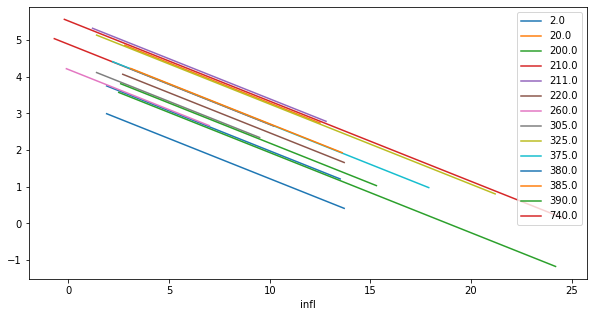

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
df_new_sort.groupby('country').plot('infl', 'y_hat', ax=ax)
ax.legend(country)

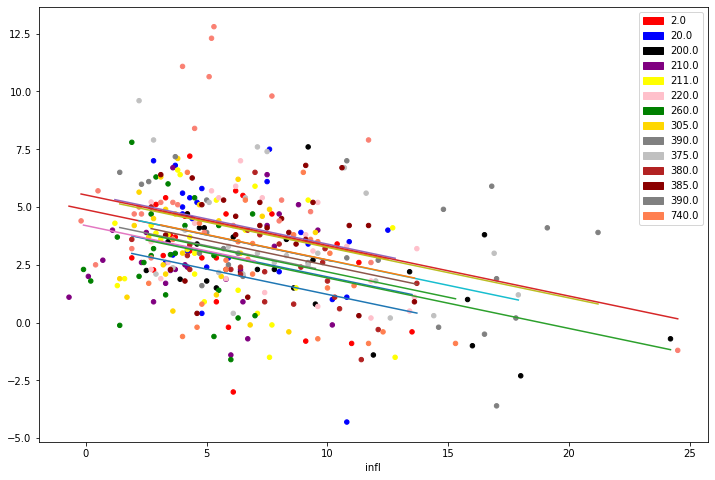

In [29]:
# creating a scatter plot of our actual obsreved values of X (inflation) and Y (gdp) along with our predicted fits for our random intercepts
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 8))
df_new_sort.groupby('country').plot('infl', 'y_hat', ax=ax)
scatter = ax.scatter(df_new_sort['infl'], df_new_sort['gdp'], c=df_new_sort['country'].map(colors_dict), s=20)



red_patch = mpatches.Patch(color='red', label='2.0', linestyle=None)
blue_patch = mpatches.Patch(color='blue', label='20.0', linestyle=None)
black_patch = mpatches.Patch(color='black', label='200.0', linestyle=None)
purple_patch = mpatches.Patch(color='purple', label='210.0', linestyle=None)
yellow_patch = mpatches.Patch(color='yellow', label='211.0', linestyle=None)
pink_patch = mpatches.Patch(color='pink', label='220.0', linestyle=None)
green_patch = mpatches.Patch(color='green', label='260.0', linestyle=None)
gold_patch = mpatches.Patch(color='gold', label='305.0', linestyle=None)
grey_patch = mpatches.Patch(color='grey', label='325.0', linestyle=None)
silver_patch = mpatches.Patch(color='silver', label='375.0', linestyle=None)
firebrick_patch = mpatches.Patch(color='firebrick', label='380.0', linestyle=None)
darkred_patch = mpatches.Patch(color='darkred', label='385.0', linestyle=None)
grey_patch = mpatches.Patch(color='grey', label='390.0', linestyle=None)
coral_patch = mpatches.Patch(color='coral', label='740.0', linestyle=None)


plt.legend(handles=[red_patch, blue_patch, black_patch, purple_patch, yellow_patch, pink_patch, green_patch, gold_patch, grey_patch, silver_patch,
                    firebrick_patch, darkred_patch, grey_patch, coral_patch])

For random slopes/intercepts combined model -- don't include random effects if we are interesting in calculating the between group prediction values in the formulas to produce the spaghetti plots. But we include it and care about within group variation, then we need to include/account for the random effects. 

In [30]:
print(model.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: gdp      
No. Observations:   350     Method:             REML     
No. Groups:         14      Scale:              3.9820   
Min. group size:    25      Likelihood:         -757.7985
Max. group size:    25      Converged:          Yes      
Mean group size:    25.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       5.996    1.117  5.370 0.000  3.808  8.185
leftlab        -0.149    0.176 -0.847 0.397 -0.495  0.196
infl           -0.219    0.030 -7.396 0.000 -0.276 -0.161
infl_group_avg  0.193    0.147  1.313 0.189 -0.095  0.480
unem           -0.309    0.048 -6.392 0.000 -0.404 -0.214
trade          -0.013    0.009 -1.443 0.149 -0.030  0.005
country Var     0.622    0.176                           



In [31]:
# square root of the country Var (random effect (random intercept only in this case))
f"On average, country level groupings/effects vary {np.sqrt(0.690)} units in their effect on gdp (economic growth)"

'On average, country level groupings/effects vary 0.8306623862918074 units in their effect on gdp (economic growth)'

In [32]:
new_line = '\n'
# calculating ICC --> taking variance of the random effect divided by unexplained variance of the model (found in scale in model output)
f"The ICC = {0.690 / 3.9784} which suggests to us that roughly 17 % of the variation in gdp (economic growth) is explained by country-group (level) differences (ie 17% of the variation in gdp is explained purely by what country one lives in"

'The ICC = 0.17343655741001407 which suggests to us that roughly 17 % of the variation in gdp (economic growth) is explained by country-group (level) differences (ie 17% of the variation in gdp is explained purely by what country one lives in'

## **Interpretation**:
* Overall, our fixed effects show that for our main IV of interest "leftlab" that it is not statistically significant even though its sign is correct being negative in the sense that labor parties have a negative effect on economic growth which is what we would traditionally theorize. The coefficient for inflation however, highly statistically significant and negative meaning for every one unit increase in inflation, gdp (economic growth can be expected to decrease by -.210 units. Our variable representing unemployment was also highly statistically significant at the p < .01 level and negative with a coefficient value of -.295 suggesting to us that greater unemployment leads to a loss in economic development or (gdp). Our IV trade also tells a similar story as to uemployment and inflation except that this variable is statistically signifiacnt at the p < .05 level. 

Our random effects (random intercept) in this case has a standard deviation of .83 units suggesting that purely by country-level groups, that differences between countries on gdp can cause variation of 1 standard deviation plus or minues .83 units suggesting to us that country level differences do matter for gdp and aid in explaining the variation in gdp. 

# **Question 3 Random Slopes Model**

Using the model estimated in question #2, add a random effect to one of the independent variables of your choosing. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results.

In [33]:
model = smf.mixedlm("gdp ~ leftlab + infl + unem + trade",
                    df,
                    groups= "country").fit()

print(model.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              3.9784   
Min. group size:  25      Likelihood:         -757.6406
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.268    0.583 12.463 0.000  6.125  8.411
leftlab      -0.105    0.171 -0.613 0.540 -0.441  0.231
infl         -0.210    0.029 -7.245 0.000 -0.267 -0.153
unem         -0.295    0.048 -6.185 0.000 -0.388 -0.201
trade        -0.016    0.009 -1.894 0.058 -0.033  0.001
country Var   0.690    0.181                           



In [34]:
# Random Slope Model: Random intercepts and slopes are independent

model2 = smf.mixedlm("gdp ~ leftlab + infl + unem + trade", df, groups= "country",
                     re_formula = "0 + leftlab").fit()

print(model2.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              4.0509   
Min. group size:  25      Likelihood:         -759.7101
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.255    0.437 16.619 0.000  6.400  8.111
leftlab      -0.120    0.195 -0.613 0.540 -0.503  0.263
infl         -0.209    0.029 -7.181 0.000 -0.266 -0.152
unem         -0.322    0.048 -6.760 0.000 -0.416 -0.229
trade        -0.012    0.007 -1.732 0.083 -0.026  0.002
leftlab Var   0.128    0.037                           



In [35]:
# accessin the keys country codes for the random effects diciontary and its values from the model output 
model2.random_effects.keys()

dict_keys([2.0, 20.0, 200.0, 210.0, 211.0, 220.0, 260.0, 305.0, 325.0, 375.0, 380.0, 385.0, 390.0, 740.0])

In [36]:
# creating a list out of the keys in the dictionary for country identifiers in this case
country = list(model2.random_effects.keys())
country


[2.0,
 20.0,
 200.0,
 210.0,
 211.0,
 220.0,
 260.0,
 305.0,
 325.0,
 375.0,
 380.0,
 385.0,
 390.0,
 740.0]

In [37]:
# creating a list of our dictionary values 
values = list(model2.random_effects.values())
values

[leftlab   -0.213282
 dtype: float64, leftlab    0.316405
 dtype: float64, leftlab   -0.244166
 dtype: float64, leftlab   -0.039912
 dtype: float64, leftlab    0.356446
 dtype: float64, leftlab   -0.005478
 dtype: float64, leftlab   -0.446485
 dtype: float64, leftlab   -0.238517
 dtype: float64, leftlab    0.481438
 dtype: float64, leftlab    0.136697
 dtype: float64, leftlab   -0.418102
 dtype: float64, leftlab    0.100542
 dtype: float64, leftlab   -0.078974
 dtype: float64, leftlab    0.293388
 dtype: float64]

In [38]:
# converting all values into a string to seaprate them by word in order to access the values we need in a non-messy format
values = str(values)
# sparating all of the values by word using the split function
values = values.split()
# printing the values
values

['[leftlab',
 '-0.213282',
 'dtype:',
 'float64,',
 'leftlab',
 '0.316405',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.244166',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.039912',
 'dtype:',
 'float64,',
 'leftlab',
 '0.356446',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.005478',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.446485',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.238517',
 'dtype:',
 'float64,',
 'leftlab',
 '0.481438',
 'dtype:',
 'float64,',
 'leftlab',
 '0.136697',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.418102',
 'dtype:',
 'float64,',
 'leftlab',
 '0.100542',
 'dtype:',
 'float64,',
 'leftlab',
 '-0.078974',
 'dtype:',
 'float64,',
 'leftlab',
 '0.293388',
 'dtype:',
 'float64]']

In [39]:
# creating a list of only the random effects values for our random slopes by starting at index of one and accessing every 4th value
random_slopes = values[1::4]
random_slopes 

['-0.213282',
 '0.316405',
 '-0.244166',
 '-0.039912',
 '0.356446',
 '-0.005478',
 '-0.446485',
 '-0.238517',
 '0.481438',
 '0.136697',
 '-0.418102',
 '0.100542',
 '-0.078974',
 '0.293388']

In [40]:
# creating a copy of the main dataframe to add the random slopes and y_hat predictions into the dataframe for plotting
df2 = df.copy()

In [41]:
# creating a dictionary of our country keys and random effects values for the random slopes for the variable "inflation"
random_slopes = dict(zip(country, random_slopes))
random_slopes


{2.0: '-0.213282',
 20.0: '0.316405',
 200.0: '-0.244166',
 210.0: '-0.039912',
 211.0: '0.356446',
 220.0: '-0.005478',
 260.0: '-0.446485',
 305.0: '-0.238517',
 325.0: '0.481438',
 375.0: '0.136697',
 380.0: '-0.418102',
 385.0: '0.100542',
 390.0: '-0.078974',
 740.0: '0.293388'}

In [42]:
# mapping in the random slopes to the dataframe to plot to match the values corresponding to their country code identifiers
# also here when adding random slopes back into dataframe -- we are convertnig them to floats given that above we had originally converted their dictionary values to strings in order to parse the values 
# but for the above -- we need to convert back to float in order to do y=mx+b calculations 
df2['random_slopes'] = df2['country'].map(random_slopes).astype(float)
df2

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_slopes
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.213282
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.213282
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.213282
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.213282
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.213282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.293388
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.293388
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.293388
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.293388


In [43]:
print(model2.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              4.0509   
Min. group size:  25      Likelihood:         -759.7101
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.255    0.437 16.619 0.000  6.400  8.111
leftlab      -0.120    0.195 -0.613 0.540 -0.503  0.263
infl         -0.209    0.029 -7.181 0.000 -0.266 -0.152
unem         -0.322    0.048 -6.760 0.000 -0.416 -0.229
trade        -0.012    0.007 -1.732 0.083 -0.026  0.002
leftlab Var   0.128    0.037                           



In [44]:
# calculating the random intercepts and random slopes y = mx+b function predictions for our values for the variable inflation while holding all other values at their means
df2['y_hat'] = 7.255 + (-0.120 * df2['leftlab'].mean()) + ((-0.209 + df2['random_slopes']) * df2['infl']) + (-0.322 * df2['unem'].mean()) + (-0.012 * df2['trade'].mean())
df2

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_slopes,y_hat
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-0.213282,3.494116
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-0.213282,3.536344
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-0.213282,2.945150
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-0.213282,2.438411
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-0.213282,2.227270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.293388,4.752489
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.293388,4.701856
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.293388,4.760928
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.293388,4.912826


In [45]:
# sorting values based on our country groups and predictions to prepare for plotting from low to high
df2_sort = df2.sort_values(['country', 'y_hat']).copy()
df2_sort

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_slopes,y_hat
14,2.0,1980-01-01,7.1,13.5,-0.4,5.8,11.3,2.6,19.732849,0.0,...,0.0,1.0,0.0,2.031032,1.299158,2.638631,23.679420,5.892,-0.213282,-0.982073
13,2.0,1979-01-01,5.8,11.3,2.6,6.1,7.7,4.7,18.175911,0.0,...,1.0,0.0,0.0,1.883898,1.299158,2.447482,58.162914,5.892,-0.213282,-0.053053
8,2.0,1974-01-01,5.6,11.0,-0.9,4.9,6.2,5.7,13.772550,0.0,...,1.0,0.0,0.0,1.940439,0.433172,0.840543,11.018040,5.892,-0.213282,0.073632
15,2.0,1981-01-01,7.5,10.4,3.4,7.1,13.5,-0.4,21.510571,0.0,...,0.0,1.0,0.0,2.002635,0.433172,0.867485,36.567970,5.892,-0.213282,0.327001
9,2.0,1975-01-01,8.5,9.1,-0.8,5.6,11.0,-0.9,17.423260,0.0,...,1.0,0.0,0.0,1.973228,0.640445,1.263744,-5.226978,5.892,-0.213282,0.875968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,740.0,1977-01-01,2.0,8.1,5.3,2.0,9.3,4.8,28.036610,1.0,...,1.0,0.0,0.0,2.193120,0.957008,2.098834,100.931793,5.540,0.293388,5.402277
335,740.0,1976-01-01,2.0,9.3,4.8,1.9,11.8,2.6,27.428520,1.0,...,1.0,0.0,0.0,2.200501,0.957008,2.105898,137.142609,5.540,0.293388,5.503542
332,740.0,1973-01-01,1.3,11.7,7.9,1.4,4.5,8.4,20.166401,1.0,...,0.0,0.0,0.0,2.219112,1.034265,2.295149,120.998405,5.540,0.293388,5.706074
334,740.0,1975-01-01,1.9,11.8,2.6,1.4,24.5,-1.2,29.917490,1.0,...,1.0,0.0,0.0,2.199802,1.034265,2.275177,-8.975247,5.540,0.293388,5.714512


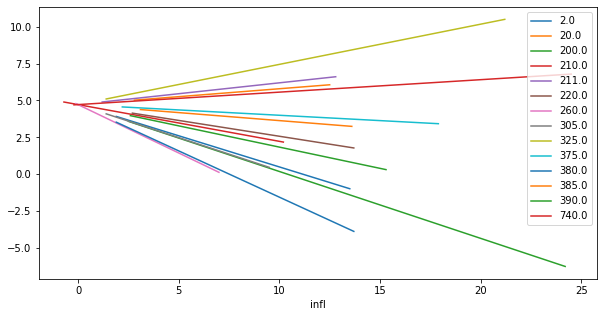

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
df2_sort.groupby('country').plot('infl', 'y_hat', ax=ax)
ax.legend(country)

In [47]:
# standard deviation of leftlab variacne
np.sqrt(.128)

0.35777087639996635

## **Model Interpretation**

* In this random slopes model above where the random slope coefficient is for the variable "leftlab" labor party and (no random intercepts) our model has converged. In interpreting the values, our independent variables (fixed effects) for inflation, unemployment, and trade, were all negatively signed once again statisticallly significant suggesting to us that unit increases in each of these 3 variables causes gdp (economic development) to decline. For our main variable of interest "leftlab" this variable was not statistically signifiacnt but was negatively signed (the correct direction we should expect for the variables impact on gdp).

In interpreting the leftlab random slope, the variance is .128 which means that the standard deviation = .35 units. This indicates that from cluster to cluster, ie between countries, the "leftlab" (left labor party) variable's slope fluctuates by +- .35 - .70 (1-2 standard deviations)



# **Question 3: Random Intercepts & Slope Model**

In [48]:
# Random Slope Model: Random intercepts and slopes are correlated

model3 = smf.mixedlm("gdp ~ leftlab + infl + unem + trade", df, groups= "country",
                     re_formula = "1 + leftlab").fit()

print(model3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    gdp      
No. Observations:    350        Method:                REML     
No. Groups:          14         Scale:                 3.8733   
Min. group size:     25         Likelihood:            -759.8779
Max. group size:     25         Converged:             No       
Mean group size:     25.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              7.231    0.640 11.292 0.000  5.976  8.486
leftlab                0.006    0.281  0.021 0.983 -0.545  0.557
infl                  -0.213    0.029 -7.235 0.000 -0.270 -0.155
unem                  -0.312    0.055 -5.699 0.000 -0.420 -0.205
trade                 -0.018    0.010 -1.781 0.075 -0.037  0.002
country Var            1.040    0.791  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2063: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2075: ConvergenceWarning: Gradient optimization failed, |grad| = 21.436935
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [49]:
# accessin the keys country codes for the random effects diciontary and its values from the model output 
model3.random_effects.keys()

dict_keys([2.0, 20.0, 200.0, 210.0, 211.0, 220.0, 260.0, 305.0, 325.0, 375.0, 380.0, 385.0, 390.0, 740.0])

In [50]:
# creating a list out of the keys in the dictionary for country identifiers in this case
country = list(model3.random_effects.keys())
country


[2.0,
 20.0,
 200.0,
 210.0,
 211.0,
 220.0,
 260.0,
 305.0,
 325.0,
 375.0,
 380.0,
 385.0,
 390.0,
 740.0]

In [51]:
# creating a list of our dictionary values 
values = list(model3.random_effects.values())
values

[country   -1.000063
 leftlab    0.426979
 dtype: float64, country    0.987173
 leftlab   -0.174829
 dtype: float64, country    0.651665
 leftlab   -0.592975
 dtype: float64, country   -0.259706
 leftlab    0.153067
 dtype: float64, country    0.136608
 leftlab    0.480401
 dtype: float64, country    0.190812
 leftlab   -0.123864
 dtype: float64, country   -0.560263
 leftlab   -0.259957
 dtype: float64, country    0.078087
 leftlab   -0.295495
 dtype: float64, country   -0.171706
 leftlab    0.541921
 dtype: float64, country   -0.162924
 leftlab    0.188307
 dtype: float64, country   -0.254161
 leftlab   -0.396672
 dtype: float64, country   -0.226110
 leftlab    0.229435
 dtype: float64, country   -0.216961
 leftlab    0.007043
 dtype: float64, country    0.807549
 leftlab   -0.183361
 dtype: float64]

In [52]:
# converting all values into a string to seaprate them by word in order to access the values we need in a non-messy format
values = str(values)
# sparating all of the values by word using the split function
values = values.split()
# printing the values
values

['[country',
 '-1.000063',
 'leftlab',
 '0.426979',
 'dtype:',
 'float64,',
 'country',
 '0.987173',
 'leftlab',
 '-0.174829',
 'dtype:',
 'float64,',
 'country',
 '0.651665',
 'leftlab',
 '-0.592975',
 'dtype:',
 'float64,',
 'country',
 '-0.259706',
 'leftlab',
 '0.153067',
 'dtype:',
 'float64,',
 'country',
 '0.136608',
 'leftlab',
 '0.480401',
 'dtype:',
 'float64,',
 'country',
 '0.190812',
 'leftlab',
 '-0.123864',
 'dtype:',
 'float64,',
 'country',
 '-0.560263',
 'leftlab',
 '-0.259957',
 'dtype:',
 'float64,',
 'country',
 '0.078087',
 'leftlab',
 '-0.295495',
 'dtype:',
 'float64,',
 'country',
 '-0.171706',
 'leftlab',
 '0.541921',
 'dtype:',
 'float64,',
 'country',
 '-0.162924',
 'leftlab',
 '0.188307',
 'dtype:',
 'float64,',
 'country',
 '-0.254161',
 'leftlab',
 '-0.396672',
 'dtype:',
 'float64,',
 'country',
 '-0.226110',
 'leftlab',
 '0.229435',
 'dtype:',
 'float64,',
 'country',
 '-0.216961',
 'leftlab',
 '0.007043',
 'dtype:',
 'float64,',
 'country',
 '0.807549'

In [53]:
# creating a list of only the random effects values by starting at index of one and accessing every 6th value
random_intercepts = values[1::6]
random_intercepts


['-1.000063',
 '0.987173',
 '0.651665',
 '-0.259706',
 '0.136608',
 '0.190812',
 '-0.560263',
 '0.078087',
 '-0.171706',
 '-0.162924',
 '-0.254161',
 '-0.226110',
 '-0.216961',
 '0.807549']

In [54]:
# creating a list of the random slope values starting at index of 3 for every 6th value 
random_slopes = values[3::6]
random_slopes

['0.426979',
 '-0.174829',
 '-0.592975',
 '0.153067',
 '0.480401',
 '-0.123864',
 '-0.259957',
 '-0.295495',
 '0.541921',
 '0.188307',
 '-0.396672',
 '0.229435',
 '0.007043',
 '-0.183361']

In [55]:
# creating a new dataframe that is a copy of the original dataframe 
df3 = df.copy()
df3

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,1,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,1,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,1,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,1,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540


In [56]:
# creating a dictionary of our country keys and random effects values 
random_intercepts = dict(zip(country, random_intercepts))
random_intercepts


{2.0: '-1.000063',
 20.0: '0.987173',
 200.0: '0.651665',
 210.0: '-0.259706',
 211.0: '0.136608',
 220.0: '0.190812',
 260.0: '-0.560263',
 305.0: '0.078087',
 325.0: '-0.171706',
 375.0: '-0.162924',
 380.0: '-0.254161',
 385.0: '-0.226110',
 390.0: '-0.216961',
 740.0: '0.807549'}

In [57]:
# creating a dictionary of our country keys and random slope values
random_slopes = dict(zip(country, random_slopes))
random_slopes


{2.0: '0.426979',
 20.0: '-0.174829',
 200.0: '-0.592975',
 210.0: '0.153067',
 211.0: '0.480401',
 220.0: '-0.123864',
 260.0: '-0.259957',
 305.0: '-0.295495',
 325.0: '0.541921',
 375.0: '0.188307',
 380.0: '-0.396672',
 385.0: '0.229435',
 390.0: '0.007043',
 740.0: '-0.183361'}

In [58]:
# mapping in both the random intercepts and random slopes to the dataframe to plot to match the values corresponding to their country code identifiers
# also here when adding both random intercepts and slopes back into dataframe -- we are convertnig them to floats given that above we had originally converted their dictionary values to strings in order to parse the values 
# but for the above -- we need to convert back to float in order to do y=mx+b calculations 
df3['random_intercepts'] = df3['country'].map(random_intercepts).astype(float)
df3['random_slopes'] =df3['country'].map(random_slopes).astype(float)
df3

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per7479,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_intercepts,random_slopes
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-1.000063,0.426979
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-1.000063,0.426979
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-1.000063,0.426979
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-1.000063,0.426979
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-1.000063,0.426979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.807549,-0.183361
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.807549,-0.183361
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.807549,-0.183361
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.807549,-0.183361


In [59]:
print(model3.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    gdp      
No. Observations:    350        Method:                REML     
No. Groups:          14         Scale:                 3.8733   
Min. group size:     25         Likelihood:            -759.8779
Max. group size:     25         Converged:             No       
Mean group size:     25.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              7.231    0.640 11.292 0.000  5.976  8.486
leftlab                0.006    0.281  0.021 0.983 -0.545  0.557
infl                  -0.213    0.029 -7.235 0.000 -0.270 -0.155
unem                  -0.312    0.055 -5.699 0.000 -0.420 -0.205
trade                 -0.018    0.010 -1.781 0.075 -0.037  0.002
country Var            1.040    0.791  

In [60]:
# calculating the random intercepts and random slopes y = mx+b function predictions for our values for the variable inflation while holding all other values at their means
df3['y_hat'] = (7.231 + df3['random_intercepts']) + (0.006 * df3['leftlab'].mean()) + ((-0.213 + df3['random_slopes']) * df3['infl']) + (-0.312 * df3['unem'].mean()) + (-0.018 * df3['trade'].mean())

In [61]:
df3

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_intercepts,random_slopes,y_hat
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-1.000063,0.426979,4.278182
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-1.000063,0.426979,4.256784
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0.0,0.0,1.818176,1.176678,2.139408,57.507980,5.892,-1.000063,0.426979,4.556354
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0.0,0.0,1.828545,0.433172,0.792074,55.310432,5.892,-1.000063,0.426979,4.813129
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0.0,0.0,1.833971,0.433172,0.794424,35.684189,5.892,-1.000063,0.426979,4.920119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.807549,-0.183361,5.306710
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0.0,1.0,1.937110,0.729007,1.412168,74.493561,5.540,0.807549,-0.183361,5.544527
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.807549,-0.183361,5.267074
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0.0,1.0,1.979984,0.729007,1.443423,76.325027,5.540,0.807549,-0.183361,4.553624


In [62]:
# sorting values based on our country groups and predictions to prepare for plotting from low to high
df3_sort = df3.sort_values(['country', 'y_hat']).copy()
df3_sort

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,per8084,per8690,corp,leftlab,clint,demand,infl_group_avg,random_intercepts,random_slopes,y_hat
20,2.0,1986-01-01,7.0,1.9,2.800000,7.1,3.50000,3.800000,17.203711,0.0,...,0.0,1.0,2.112881,0.476511,1.006810,51.611130,5.892,-1.000063,0.426979,4.064203
1,2.0,1967-01-01,3.8,2.8,2.277283,3.8,2.90000,5.111141,9.983546,0.0,...,0.0,0.0,1.807786,1.176678,2.127182,36.939121,5.892,-1.000063,0.426979,4.256784
0,2.0,1966-01-01,3.8,2.9,5.111141,4.5,1.99005,5.934182,9.622906,0.0,...,0.0,0.0,1.798529,1.376415,2.475521,51.963692,5.892,-1.000063,0.426979,4.278182
17,2.0,1983-01-01,9.5,3.2,2.900000,9.5,6.10000,-3.000000,18.569719,0.0,...,1.0,0.0,1.676164,0.544346,0.912413,50.138245,5.892,-1.000063,0.426979,4.342375
6,2.0,1972-01-01,5.6,3.3,5.400000,5.9,4.30000,3.100000,11.217710,0.0,...,0.0,0.0,1.843797,0.484048,0.892486,59.453861,5.892,-1.000063,0.426979,4.363773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,740.0,1985-01-01,2.6,2.0,4.700000,2.7,2.20000,5.000000,30.654100,0.0,...,0.0,0.0,1.948334,1.049339,2.044463,107.289352,5.540,0.807549,-0.183361,4.672532
342,740.0,1983-01-01,2.6,1.9,3.200000,2.4,2.70000,2.800000,32.806080,0.0,...,1.0,0.0,2.421978,1.049339,2.541476,88.576416,5.540,0.807549,-0.183361,4.712169
347,740.0,1988-01-01,2.5,0.5,5.700000,2.9,-0.20000,4.400000,21.712351,0.0,...,0.0,1.0,1.986012,0.729007,1.447818,97.705582,5.540,0.807549,-0.183361,5.267074
345,740.0,1986-01-01,2.8,0.4,2.500000,2.6,2.00000,4.700000,29.161591,0.0,...,0.0,1.0,1.942272,0.729007,1.415931,87.484772,5.540,0.807549,-0.183361,5.306710


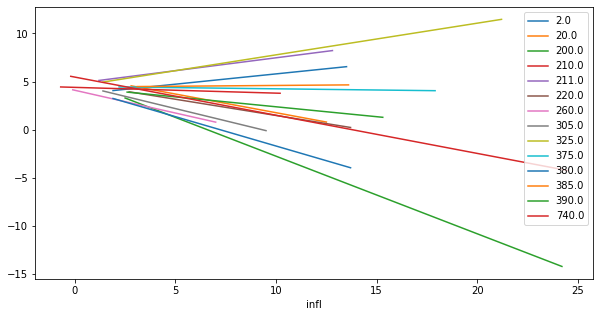

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
df3_sort.groupby('country').plot('infl', 'y_hat', ax=ax)
ax.legend(country)

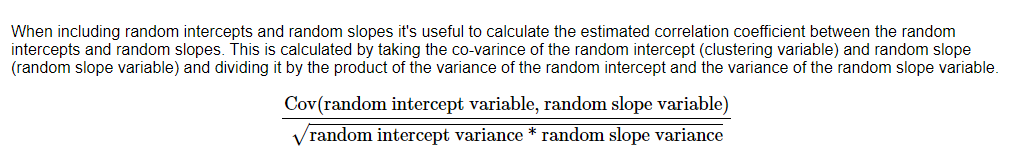

In [64]:
# calculating the correlation coeficient between random intercepts and random slopes
-0.448 / (np.sqrt(1.040 * .528))

-0.6045669239225426

## **Interpretation Random Intercepts Random Slopes Model** 

In interpreting the results of our random intercept random slope model, inflation, unemployment, and trade, once again were all negatively signed and statistically significant suggesting to us that increases in each of these variables causes a decline in gdp. Our key variable of interest "leftlab" remained statistically insignificant once again in terms of the fixed effects. 

With regards to the random effects (the random slope (for leftlab variable) and intercept (country groups) in this case) -- we can interpret them in the following way. The correlation coefficient between the 2 equals -.60 in the formula calcualted above, suggesting to us that countries with more left labor parties tend to have lower gdp. 






# **Assumptions Checking**

## **a. Normality**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

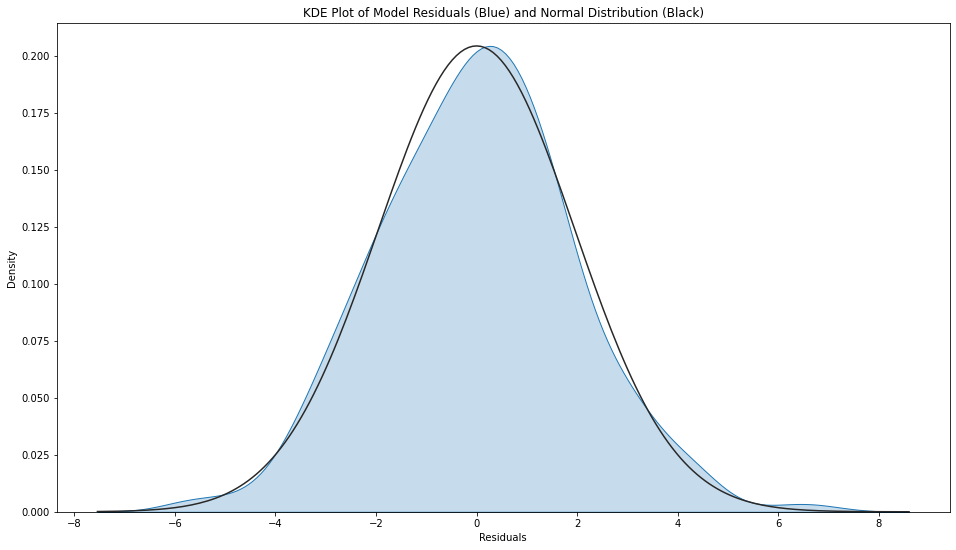

In [65]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

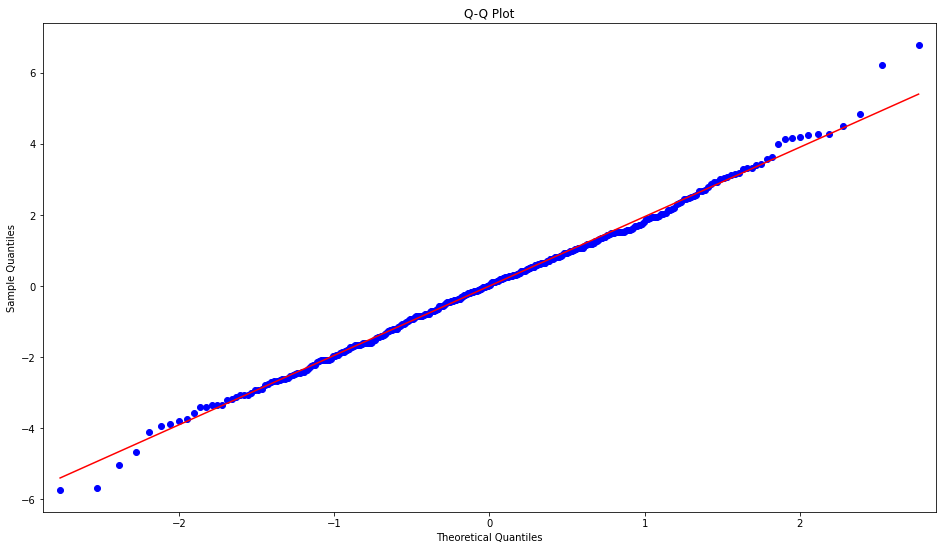

In [66]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

There is some deviation from normality, but it doesn't look concerning. There is an outlier or 2 at the way top, which is evident in both of the plots. How to handle the outlier is up to the researcher.

In [67]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9967729449272156
p-value 0.7129114866256714


The test is significant which indicates that the assumption of normality for the residuals is violated. This would suggest that the model could be adjusted to meet this assumption. Common techniques include transform variables, remove outliers, use a non-parametric approach, or rely on the central limit theorem. 

## **b. HOMOSKEDASTICITY OF VARIANCE**

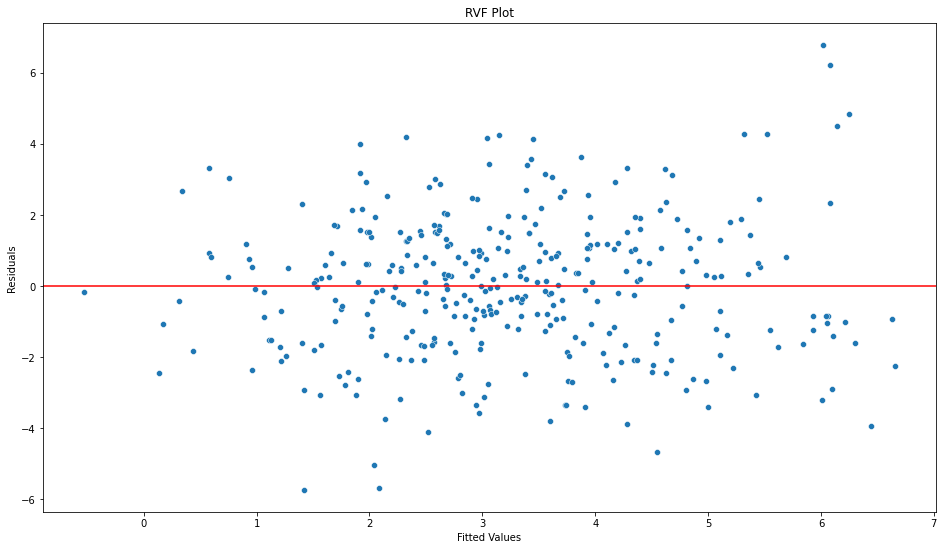

In [68]:
# plotting residuals vs. fitted values
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.axhline(0, color='red')

In [69]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 33.832488328695135
LM-Test p-value 0.0021818792625377618
F-Statistic 2.5605512384875624
F-Test p-value 0.0016508175429805836


(Visually, it appears that we have a rather constant (homoskedastic variance), but our test statistics tell us otherwise & that our model is suffering from heteroskedasticity). Therefore, we can either increase our N, transform variables, or model for the outliers

# **Question 4 Likelihood Ratio Test**

**Conduct a likelihood ratio test to determine whether the model warrants a random slope effect. For Stata users, you will use the lrtest command (make sure to store the estimates for the random intercept and random slope models). For R users, you will use the anova() function (make sure to specify the object name for the “restricted model” (random intercept) first, followed by the object name for the “unrestricted model” (random slope) second).**

For likelihood ratio tests in pyton:

https://stackoverflow.com/questions/30541543/how-can-i-perform-a-likelihood-ratio-test-on-a-linear-mixed-effect-model



In [70]:
print(model.llf)
print(model2.llf)
print(model3.llf)

-757.6405636421308
-759.7101361666531
-759.8778835350362


In [71]:
import scipy as scipy

In [72]:

#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(model.llf - model3.llf)

print(LR_statistic)



#calculate p-value of test statistic using 2 degrees of freedom || degrees of freedom is calculated by the total difference of all variables used between the two models
p_val = scipy.stats.chi2.sf(LR_statistic, 2)

print(p_val)



-4.474639785810723
1.0


**H0: The full model and the nested model fit the data equally well. Thus, you should use the nested model.**

**HA: The full model fits the data significantly better than the nested model. Thus, you should use the full model**

* **If the p-value of the test is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that the full model offers a significantly better fit.**

From the output we can see that the Chi-Squared test-statistic is -4.47 and the corresponding p-value is 1.0.

Since this p-value is not less than .05, we will fail to reject the null hypothesis.

This means the full model and the restricted model (pure random intercept model) fit the data equally well. Thus, we should use the restricted model because the additional predictor variables in the full model don’t offer a significant improvement in fit.

Thus, the final model chosen for estimation out of the three estimated in this analysis is model 1 (our most restricted baseline model that estimates a random-intercept model)

# **Question 5**

**Explain the importance for estimating a multilevel model for nested data. What are the issues one may encounter if utilizing a pooled model?**

**Answer**:

* The importance of estimating a multilevel model for nested data is critical in order to be able to explain all of the levels of variation that go into explaining one's outcome. For instance, by estimating nested data with a multilevel framework, a researcher is able to exploit not only the impacts of group level variation (random effects) but also within unit variation (fixed effects). Depending on the research problem, the researcher can exploit multilevel models further with regard to hypothesizing rates of change for certain variables and how they differ across groups in explaining the variation in a given dependent variable with a random slope, random intercept model. There are so many benefits that one can derive from the multilevel-modeling context as opposed to other pooled estimation techniques that merely seek to estimate "away" and not deal with all of the various observed and unobserved heterogeneities. 

Some issues one may encounter if uitlizing a pooled model is an explicit violation of the asusmption of conditional independence. Our xi's in this case are clearly dependent upon eachother such as a variable such as GDP where GDP one year is a strong determinant of what GDP will look like the next year. One therefore must account for both temporal autocorrelation, but also spatial autocorrelation. For instance, a variable such as trade, if 2 countries are closer toegether spatially, chances are there going to trade more, therefore their erros in the regression model may be correlated as well. One must also be sure that the assumptions of normality hold too. 